## Decision Tree Classification
In this notebook, we will walk through building a Decision Tree classifier
using the Titanic dataset. Decision trees are non-parametric models that
can capture nonlinear relationships by recursively splitting the data.
____
We'll cover:
1. Loading and inspecting the dataset.
2. Preprocessing: Handling missing values and encoding categorical data.
3. Splitting the data into training and testing sets.
4. Training a Decision Tree model.
5. Evaluating the model's performance with accuracy, confusion matrix, and a classification report.
6. Visualizing the decision tree.
7. Analyzing model performance using ROC curve and AUC.

## **Step 1: Load and Inspect the Data**

We use the Titanic dataset available from seaborn, which includes details about passengers. This dataset is widely used for classification tasks.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Load Titanic dataset in seaborn
data = sns.load_dataset('titanic')

# Inspect the dataset
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **Step 2: Data Preprocessing**

Our next step is to prepare the data for modeling:

- **Handling Missing Values:**
   Here, the line for dropping rows with missing 'age' is commented out.
   Depending on your needs, you might choose to drop these rows or use imputation.

- **Encoding Categorical Variables:**
   Decision tree algorithms can handle numerical inputs, so we convert
   categorical variables (e.g., `sex`) into numeric format using one-hot encoding.

*Note: We use drop_first=True to avoid the dummy variable trap.*

In [ ]:
# Handling missing values (optional for decision trees) - you don't need to drop them but there are tradeoffs
#data.dropna(subset=['age'], inplace=True)

# Encoding categorical variables
df = pd.get_dummies(data, columns=['sex'], drop_first=True) # Use drop_first = True to avoid "dummy trap"

# Define features and target
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']
X = df[features]
y = df['survived']

# Preview the cleaned dataset
print(X.head())
print(y.head())

   pclass   age  sibsp  parch     fare  sex_male
0       3  22.0      1      0   7.2500      True
1       1  38.0      1      0  71.2833     False
2       3  26.0      0      0   7.9250     False
3       1  35.0      1      0  53.1000     False
4       3  35.0      0      0   8.0500      True
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


### **Step 3: Splitting the Data**

We split the dataset into training and testing sets. The training set is used to build the decision tree model, while the testing set is used to evaluate its performance.

In [4]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Everything above is exactly the same as linear and logistic regression

### **Step 4: Train the Decision Tree Model**

We initialize and train a Decision Tree classifier.
**Why Decision Trees?**
- They are intuitive and easy to interpret.
- They capture non-linear relationships without needing feature scaling.
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) on sklearn.

Here, we'ss use default parameters at first, but tuning (e.g., max_depth, min_samples_split) can improve performance and prevent overfitting.

In [22]:
# We're going to use the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier
# Initialize and train tree classification model
model = DecisionTreeClassifier(random_state = 42,
                               max_depth = 4) # we can decide the maximum depth of our tree
# especially with tree-based models there is a lot of randomness, using random state is best
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### **Step 5: Evaluate the Model**

We now assess our model’s performance on the test data using several metrics:

- **Accuracy:** The overall proportion of correct predictions.
- **Confusion Matrix:** Displays the number of correct and incorrect predictions.
- **Classification Report:** Provides precision, recall, and F1-score, which help in understanding performance per class.

Accuracy: 0.80


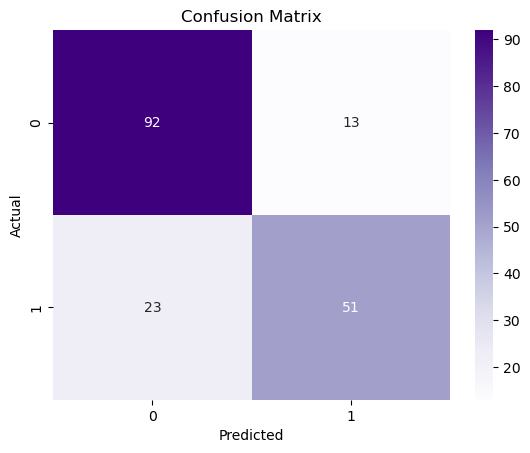

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

In [ ]:
# What do we get from our confusion matrix that was built?
# (1) F1-score overall accuracy: 0.79 --> our model does pretty well; our linear model was about 0.75, so this is a great improvement
# (2) F1-scores for the 0 and 1: 0.83 --> of the 105 cases of non survived, it is accurate 83%; of the 74 cases of survived, it is 73% accurate
# decision tree gives higher accuracy overall and for the different classes itself
# we can do all of this without having to remove data from our set like age; not losing observations

In [ ]:
# changing the depth from naturally being 25 to 4 layers deep did not change our accuracy!
# even though we build a tree using the default parameters, pruning it did not affect the model; it actually made it better
# not always the case
# possible because 

### **Step 6: Visualizing the Decision Tree**

One of the advantages of decision trees is their interpretability. We can visualize the tree structure using the graphviz library.
The visualization shows:
- Splitting criteria at each node.
- Feature names used for splits.
- Class distributions within the nodes.

In [ ]:
# Import graphviz and export the decision tree to dot format for visualization
import graphviz
from sklearn import tree

# Generate and display the decision tree graph
dot_data = tree.export_graphviz(model, # the actual model
                     feature_names = X_train.columns, # columns of our features
                     class_names = ["Not_Survived", "Survived"], # gives us our target values 
                     filled = True) # tells us the gini index and values per class
graph = graphviz.Source(dot_data)
graph # not sure why this isn't working, but it looks correct on the final notebook

### **Step 7: ROC Curve and AUC Analysis**
The ROC (Receiver Operating Characteristic) curve helps evaluate the model’s
performance across different classification thresholds:

- **ROC Curve:** Plots True Positive Rate (TPR) against False Positive Rate (FPR).
- **AUC (Area Under the Curve):** Summarizes the overall ability of the model to discriminate between classes.

Here, we calculate and plot the ROC curve along with the AUC score.

In [ ]:
# Import ROC curve metrics

# Get the predicted probabilities for the positive class (survival)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds


# Compute the Area Under the Curve (AUC) score


# Plot the ROC curve


### **Step 8: Train a Logistic Regression Model**

Call it `lr_model`

In [ ]:

# Initialize and train logistic regression model


### Step 9: Adding a ROC Curve for the Logistic Regression Model
- Copy and paste the code from Step 7.
- Replace `model` with the logistic regression model.
- Append "`_lr`" to the `y_probs`, `fpr`, `tpr`, `thresholds`, and `roc_auc` variables.
- Keep the decision trees ROC curve plot, but add a new `plt.plot()` with the new logistic regression variables.

In [ ]:
# Get the predicted probabilities for the positive class (survival)

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds

# Compute the Area Under the Curve (AUC) score

# Plot the ROC curve
